# Data Exploration
### Authors: Jack Duryea (jd50), Shashank Mahesh (sm103)

In [8]:
import pathlib
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
from scipy import stats

%matplotlib inline

current directory structure:

Data-Science-Bowl/ {   
        DataExploration.ipynb  
    Readme.md  
    stage1_sample_submission.csv  
    stage1_test/  
    stage1_train/  
    stage1_train/labels.csv 
    }
    

### Load image data

In [10]:
# Glob the training data and load a single image path
training_paths = pathlib.Path('stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[0]
im = imageio.imread(str(im_path))

### Let's check out a few example images

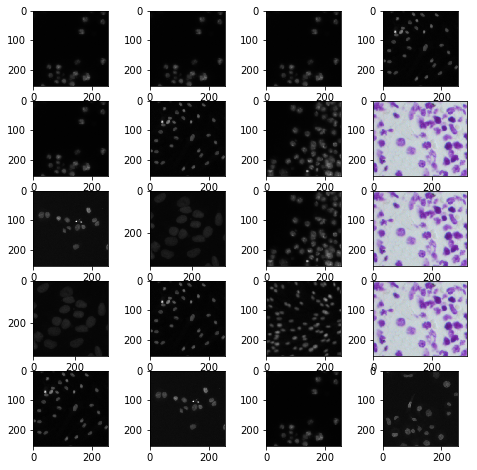

In [22]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    im_path = training_sorted[np.random.randint(i)]
    im = imageio.imread(str(im_path))
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
plt.show()

### Distribution of the number of nuclei in each image

In [29]:
outlier_images = []
nuclei_data = []
path, dirs, files = os.walk("stage1_train").next()
for case in dirs:
    p, d, masks = os.walk("stage1_train/"+case+"/masks").next()
    nuclei_count = len(masks)
    #print nuclei_count
    # outliers
    if nuclei_count > 200:
        outlier_im = imageio.imread("stage1_train/"+case+"/images/"+case+".png")
        outlier_images.append(outlier_im)
    nuclei_data.append(nuclei_count)
nuclei_data = np.array(nuclei_data)

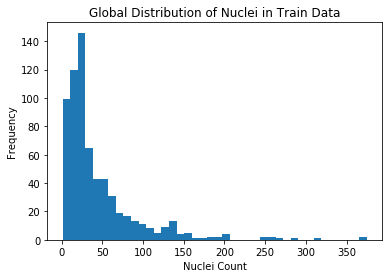

In [30]:
plt.xlabel("Nuclei Count")
plt.ylabel("Frequency")
plt.title("Global Distribution of Nuclei in Train Data")
plt.hist(nuclei_data, bins = 40);

In [31]:
# Outlier images, images with lots of nuclei

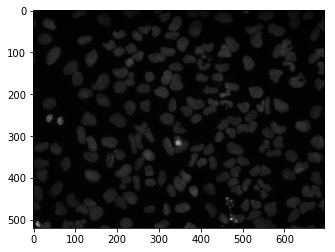

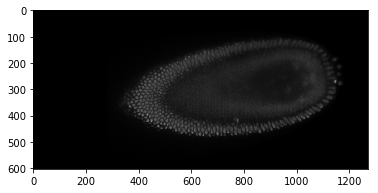

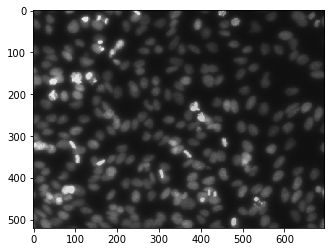

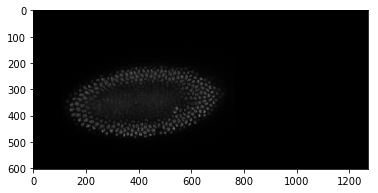

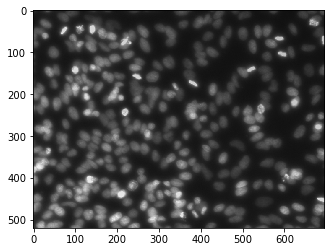

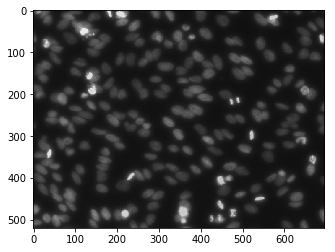

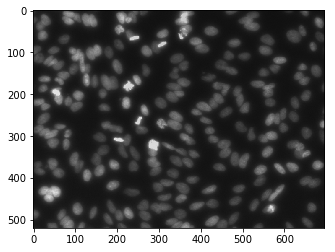

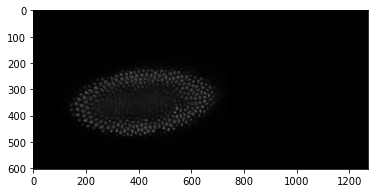

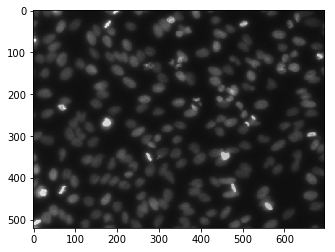

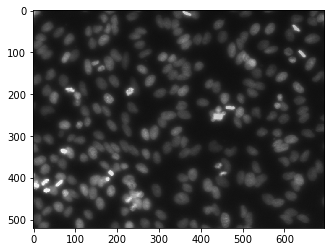

In [32]:
for im in outlier_images:
    plt.imshow(im);
    plt.show()

# Distribution of image sizes

# Overlapping Nuclei?

In [54]:
training_paths = pathlib.Path('stage1_train').glob('*')
training_sorted = sorted([x for x in training_paths])

In [18]:
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

Original image shape: (256, 256, 4)
New image shape: (256, 256)


In [55]:
path, dirs, files = os.walk("stage1_train").next()
im_count = len(dirs)

In [45]:
case0 = dirs[0]

In [64]:
stats.describe(nuclei_data)

DescribeResult(nobs=670, minmax=(1, 375), mean=43.971641791044775, variance=2300.4042768221675, skewness=2.865307317651728, kurtosis=11.325741184404169)

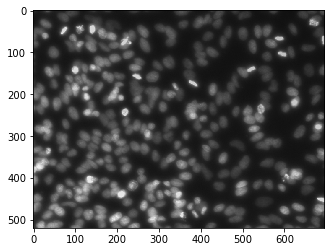

In [82]:
plt.imshow(outlier_im)

In [90]:
stats.kstest(nuclei_data, 'norm')

KstestResult(statistic=0.98820234077433999, pvalue=0.0)